## Curva de aprendizagem

A curva de aprendizagem é uma ferramenta visual para entender como o modelo aprende ao longo do tempo ou com mais dados, ajudando a identificar underfitting, overfitting e a qualidade da generalização.


Ela normalmente relaciona:
* No eixo x → quantidade de dados de treino (ou número de iterações/épocas).
* No eixo y → desempenho do modelo (erro ou acurácia, por exemplo).

Ela é usada principalmente para entender se o modelo está sofrendo de:

1. **Underfitting (alto viés):**
O modelo tem desempenho ruim tanto no treino quanto no teste. A curva mostra erro alto e pouca melhora mesmo com mais dados. Isso indica que o modelo é simples demais ou está mal configurado.

2. **Overfitting (alta variância):**
O modelo vai muito bem no treino, mas mal no teste. A curva mostra erro baixo no treino e alto no teste.
Isso indica que o modelo está “decorando” os dados de treino e não generaliza bem.

3. **Boa generalização:**
As curvas de treino e teste convergem para valores próximos e com bom desempenho.
Isso indica que o modelo está equilibrado.

#### Para que serve na prática?

* Avaliar se vale a pena coletar mais dados.
* Decidir se o modelo precisa ser mais complexo ou mais simples.
* Diagnosticar problemas de viés e variância.

### Hands-on! Prevendo câncer em pacientes de um hospital

In [15]:
#Importações
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
# Carregar o conjunto de dados de câncer de mama
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
X_train

array([[9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01],
       [2.109e+01, 2.657e+01, 1.427e+02, ..., 2.903e-01, 4.098e-01,
        1.284e-01],
       [9.173e+00, 1.386e+01, 5.920e+01, ..., 5.087e-02, 3.282e-01,
        8.490e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]], shape=(455, 30))

### Analisando a curva de aprendizagem

Essa técnica fornece um insight para mapear o quanto o modelo se comporta em diferentes tamanhos de conjunto de dados, auxiliando na identificação de problemas como overfitting, underfitting e otimização insuficiente.

Além de analisar todas as métricas aprendidas até o momento, também existe a curva de aprendizagem, que é uma técnica visual para analisar o desempenho de modelos durante o processo de treinamento. Essa técnica fornece um insight para mapear o quanto o modelo se comporta em diferentes tamanhos de conjunto de dados, auxiliando na identificação de problemas como overfitting, underfitting e otimização insuficiente.

A distância entre as duas curvas indica a generalização do modelo!

In [5]:
# Inicializar o classificador Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [6]:
# Função para plotar a curva de aprendizagem
def plot_learning_curve(estimator, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title("Curva de Aprendizagem")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Tamanho do Conjunto de Treinamento")
    plt.ylabel("Pontuação")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Pontuação de Treino")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Pontuação de Validação")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\alice\\AppData\\Local\\Programs\\Python\\Python314\\Lib\\site-packages\\matplotlib\\pyplot.py'>

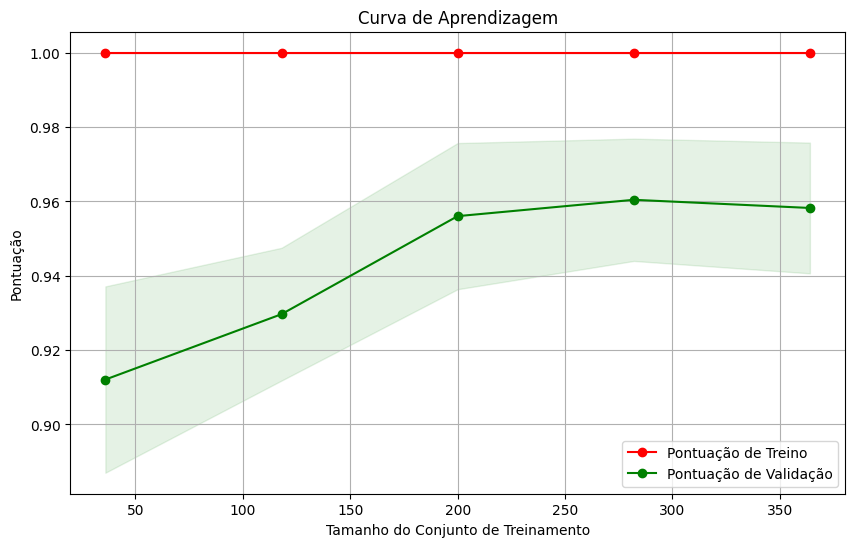

In [7]:
plot_learning_curve(rf_classifier, X_train, y_train, cv=5, n_jobs=-1)

### Feature Importance
Feature Importance é uma técnica usada para identificar quais variáveis (features ou colunas) são mais relevantes para um modelo de aprendizado de máquina fazer previsões. Quando treinamos um modelo com várias informações — como idade, salário, saldo bancário ou número de produtos — nem todas essas variáveis têm o mesmo peso na decisão final. Algumas influenciam muito o resultado, enquanto outras quase não fazem diferença. A análise de importância das features serve justamente para medir essa influência.

Em modelos baseados em árvores, como Árvores de Decisão e Random Forest, essa importância é calculada observando como cada variável ajuda a separar melhor os dados durante o treinamento. Esses modelos funcionam criando divisões sucessivas nos dados, fazendo perguntas do tipo: “idade maior que 40?”, “saldo acima de 10 mil?”, “é cliente ativo?”. O objetivo dessas divisões é tornar os grupos resultantes o mais organizados possível em relação ao que se deseja prever.

É nesse ponto que entra o conceito de impureza. Impureza mede o quanto os dados estão misturados dentro de um grupo. Por exemplo, se em um grupo temos metade dos clientes que saem do banco e metade que ficam, esse grupo é considerado muito impuro, pois está desorganizado. Por outro lado, se quase todos os clientes do grupo permanecem no banco, o grupo é mais puro. O modelo tenta escolher divisões que reduzam essa impureza ao máximo.

A importância de uma feature é calculada com base em quanto ela contribui para reduzir essa impureza ao longo das divisões. Se uma variável frequentemente gera grandes reduções na impureza, ela é considerada importante. Se quase não contribui, sua importância será baixa. No caso da Random Forest, essa medida é calculada em todas as árvores do modelo e depois é feita uma média, gerando uma pontuação final para cada variável.

O resultado é um conjunto de valores numéricos que indicam o grau de influência de cada feature na tomada de decisão do modelo. Assim, Feature Importance não apenas melhora a interpretação dos resultados, como também ajuda a entender melhor o comportamento do modelo e, em alguns casos, a simplificar a base de dados removendo variáveis pouco relevantes.

**Por que isso é útil?**
* Ajuda a entender o modelo.
* Mostra quais variáveis realmente influenciam a previsão.
* Permite remover colunas pouco importantes.
* Facilita a interpretação dos resultados.

### Cálculo da Importância das Features:
Após o treinamento do modelo, a importância das features é recuperada usando o atributo *feature_importances_.* Este atributo armazena um array NumPy onde cada elemento representa a importância da feature correspondente nas features de treinamento (X_train).

Este método calcula a importância de uma feature com base em quanto ela reduz a impureza (por exemplo, impureza de Gini para classificação) dentro de uma árvore na Floresta Aleatória.

Durante o treinamento, cada árvore na floresta divide os dados com base em features que levam à maior redução na impureza. As features que consistentemente levam a maiores reduções na impureza são consideradas mais importantes.

O atributo feature_importances_ calcula a média das pontuações de importância para cada feature em todas as árvores da floresta, fornecendo uma classificação geral de importância.

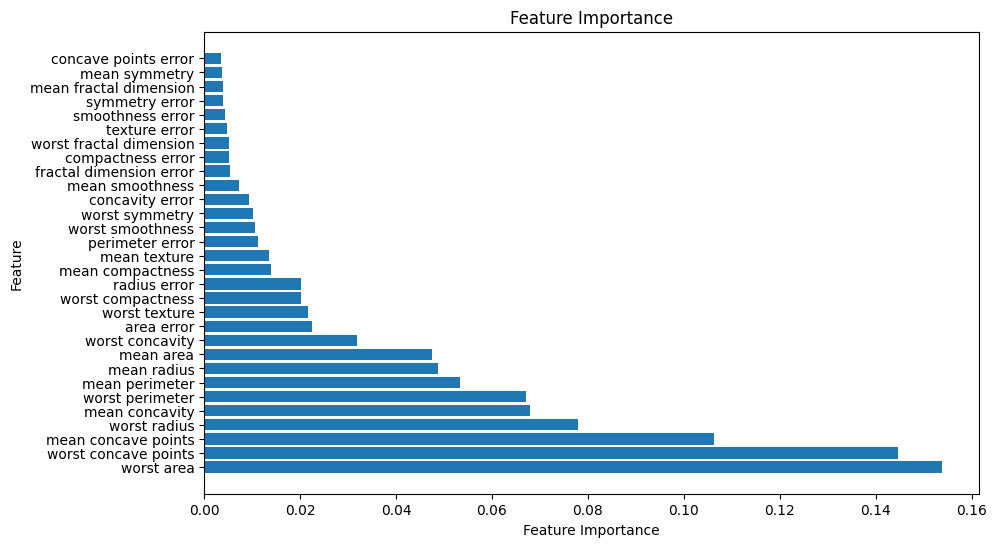

In [8]:
# Calcular importância das features
# Calcula a importância das features (atributos) usando um método chamado diminuição média da impureza para um modelo de Random Forest Classifier

rf_classifier.fit(X_train, y_train)
feature_importance = rf_classifier.feature_importances_

# Plotar importância das features
plt.figure(figsize=(10, 6))
sorted_idx = np.argsort(feature_importance)[::-1]
features = data.feature_names
plt.barh(features[sorted_idx], feature_importance[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [9]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]], shape=(569, 30)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,

### Classification Report 
O classification report trás de fato um relatório de métricas, contendo cada uma das principais métricas e sua atribuição por classe. Dentro do classification report podemos encontrar as seguintes métricas:

* **Acurácia:** é uma das métricas mais simples e básicas para utilizar para avaliar o modelo. Ela representa a proporção total de previsões corretas feitas pelo modelo em todas as classes. É calculada como o número de verdadeiros positivos (TP) mais os verdadeiros negativos (TN) dividido pelo número total de instâncias no conjunto de dados de teste (TP + TN + FP + FN). Por exemplo, se eu estou testando 1000 instâncias e meu modelo acertou 800 delas, minha acurácia é de 80%.

* **Precisão:** indica quantos dos itens que identificamos foram relevantes, o cálculo é TP/(TP+FP). A precisão para a classe "sim" para câncer seria a porcentagem de instâncias previstas como "positivo para câncer" que realmente são pessoas com câncer.

* **Recall:** indica a proporção de instâncias reais de uma classe que o modelo conseguiu prever corretamente, o cálculo é TP/(TP+FN). Continuando o exemplo anterior, o recall para a classe "sim" para câncer seria a porcentagem de instâncias previstas como "positivo para câncer" que realmente são pessoas com câncer que o modelo conseguiu prever corretamente.

* **F-Score:** também conhecida como “F1-Score”, é uma métrica que combina a precisão e a recuperação (recall) para fornecer uma pontuação única, é definida como a média harmônica da precisão e revocação.



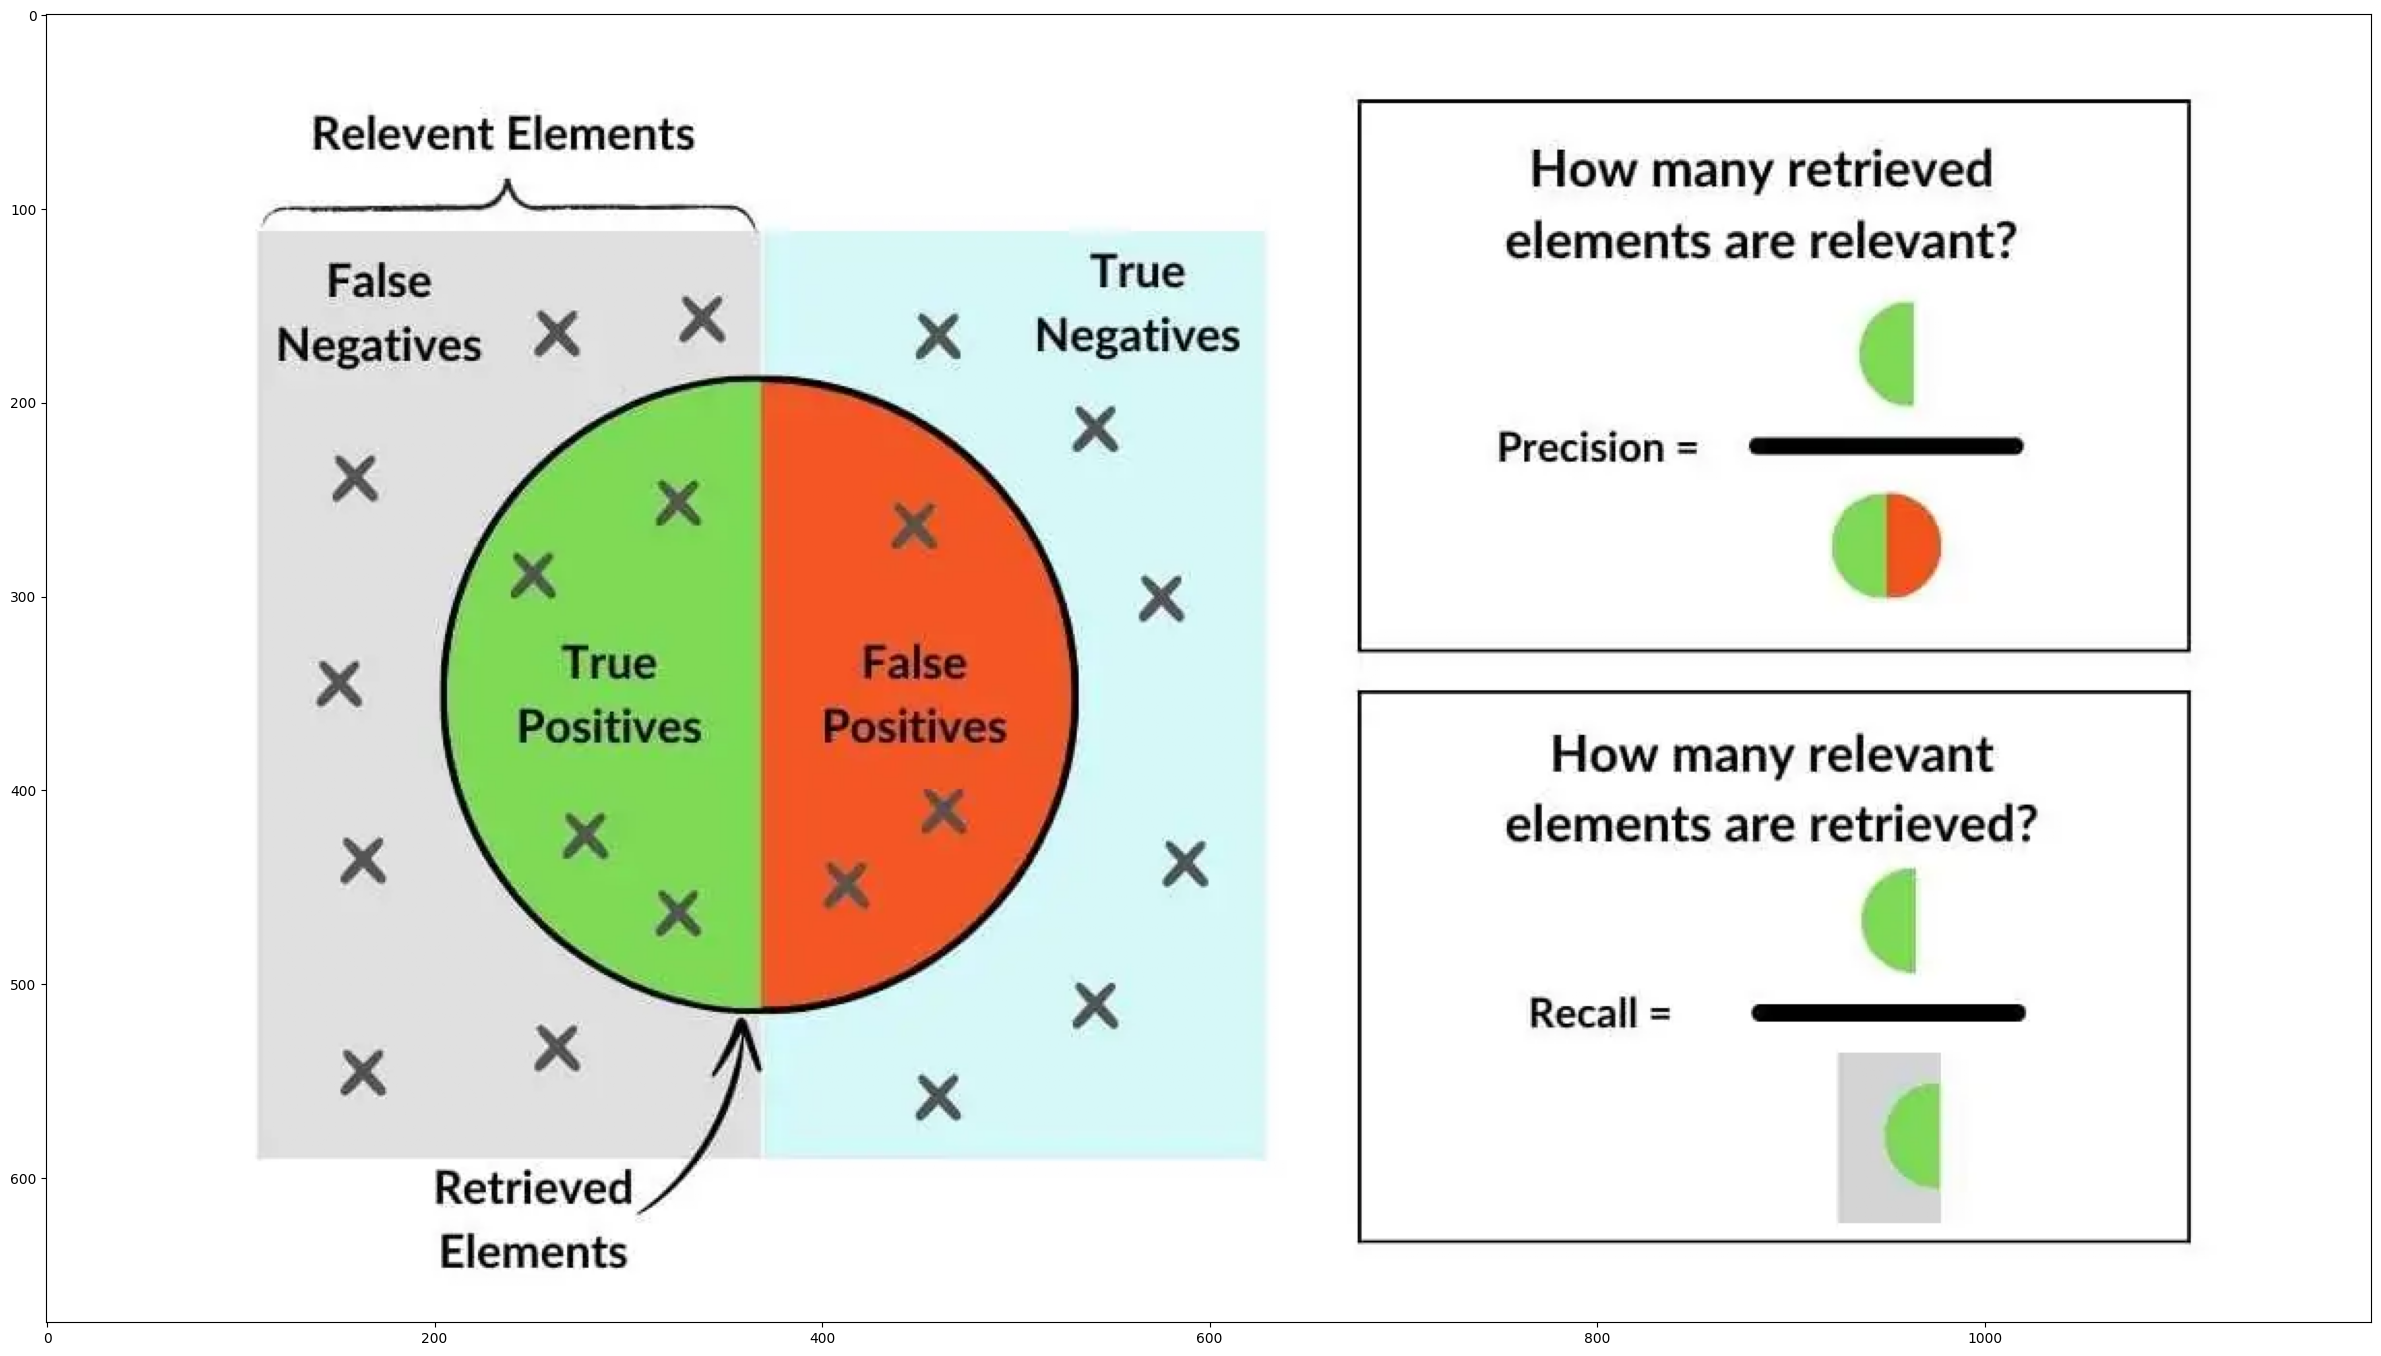

In [10]:
im = plt.imread('./images/metricas.png')
plt.figure(figsize = (30,30))
plt.imshow(im)
plt.show()

In [13]:
# Treinar o classificador com todos os dados de treinamento
rf_classifier.fit(X_train, y_train)

# Prever os rótulos para os dados de teste
y_pred = rf_classifier.predict(X_test)

# Calcular o classification report
report = classification_report(y_test, y_pred, target_names=data.target_names)

print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.93      0.95        43
      benign       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



### Grid Search 
No mundo do machine learning, encontrar os hiperparâmetros ideais para seu modelo é crucial para otimizar seu desempenho e alcançar resultados precisos. É aí que entra o Grid Search, um método de busca exaustiva que explora todas as combinações possíveis de valores de hiperparâmetros para encontrar a combinação perfeita que leva seu modelo ao topo.

In [16]:
# Definir os parâmetros a serem testados
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],2222222222222222222222222222222222222222222222
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Inicializar o classificador Random Forest
rf_classifier = RandomForestClassifier(random_state=42)

# Realizar a busca em grade para encontrar os melhores parâmetros
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Utilizar o modelo com os melhores parâmetros
best_rf_classifier = grid_search.best_estimator_

# Treinar o modelo com todos os dados de treinamento
best_rf_classifier.fit(X_train, y_train)

# Prever os rótulos para os dados de teste
y_pred = best_rf_classifier.predict(X_test)


c:\Users\alice\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alice\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\alice\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c

In [17]:
# Exibir os melhores parâmetros encontrados
print("Melhores Parâmetros Encontrados:")
print(grid_search.best_params_)

Melhores Parâmetros Encontrados:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [18]:
# Calcular e exibir o classification report
report = classification_report(y_test, y_pred, target_names=data.target_names)
print("\nClassification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



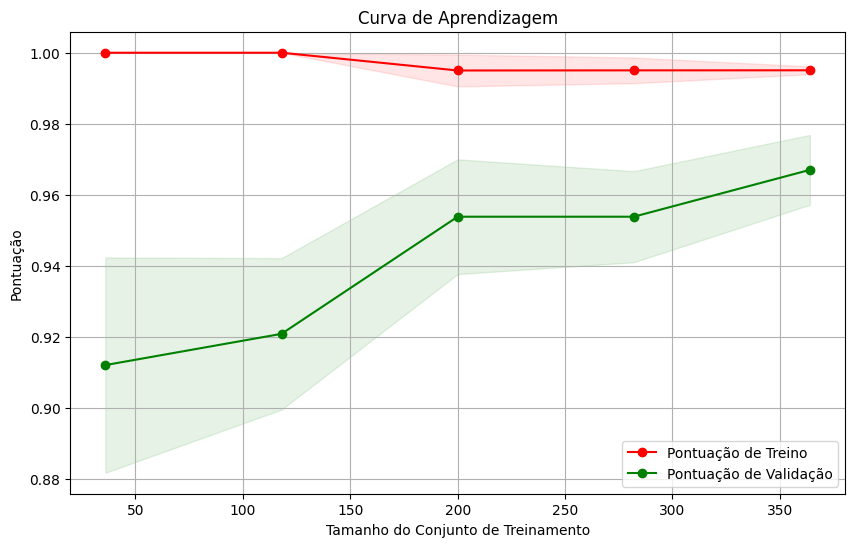

In [19]:
# Plotar a curva de aprendizagem para o novo modelo de Random Forest
plot_learning_curve(best_rf_classifier, X_train, y_train, cv=5, n_jobs=-1)
plt.show()